In [1]:
import numpy as np
import matplotlib.pyplot as plt
import probfit
import iminuit
import math
from statnight.utils.wrappers import ModelWrapper, LossFunctionWrapper, MinimizerWrapper
from statnight.parameters import Observable, Variable, Constant, POI, GaussianConstrained
from statnight.utils.stats import integrate1d
from statnight.hypothesis import Hypothesis
from statnight.hypotest import ConfidenceInterval
from statnight.calculators import AsymptoticCalculator
from statnight.cconfig import Config

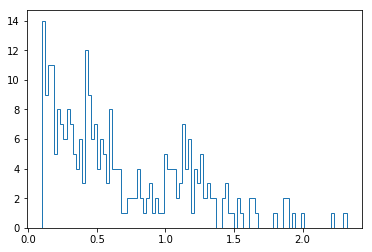

In [2]:
bounds = (0.1, 3.0)

# Data and signal

np.random.seed(0)
tau = -2.0
beta = -1/tau
data = np.random.exponential(beta, 300)
peak = np.random.normal(1.2, 0.1, 40)
data = np.concatenate((data,peak))
data = data[(data > bounds[0]) & (data < bounds[1])]

plt.hist(data, bins=100, histtype='step');

In [3]:
bkg_pdf = probfit.Normalized(probfit.exponential, bounds)
sig_pdf = probfit.Normalized(probfit.gaussian, bounds)
bkg_pdf_ext = probfit.Extended(bkg_pdf, "Nbkg")
sig_pdf_ext = probfit.Extended(sig_pdf, "Nsig")
tot_pdf = probfit.AddPdf(bkg_pdf_ext, sig_pdf_ext)

In [4]:
tot_model = ModelWrapper(tot_pdf)

tot_model.add_obs(Observable("x", range = bounds))

mean  = Variable("mean",  range=(0.5, 2.0), initvalue=1.2, initstep=0.05)
sigma = Variable("sigma", range=(0.0, 0.5), initvalue=0.1, initstep=0.001)
Nsig  = Variable("Nsig",  range=(-10,len((data))),   initvalue= 20.0,       initstep=1.0)
tau   = Variable("tau",   range=(0.1, 5.0), initvalue=0.5, initstep=0.05)
Nbkg  = Variable("Nbkg",  range=(0,len((data))*1.1), initvalue= len(data), initstep=1.0)

tot_model.add_vars(mean, sigma, Nsig, tau, Nbkg)

tot_model.extended = True

In [5]:
LH = LossFunctionWrapper(probfit.UnbinnedLH(tot_model, data, extended=True, extended_bound=bounds))

In [6]:
minimizer = MinimizerWrapper(LH)

In [7]:
minimizer.minimize();

FCN = -1220.1648881069414 
 TOTAL NCALL = 151 
 NCALLS = 151 
 
 
 EDM = 7.176841970711747e-07 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,tau,1.96388,0.153744,,,0.1,5,No
1,Nbkg,247.865,17.4019,,,0,314.6,No
2,mean,1.17089,0.0297602,,,0.5,2,No
3,sigma,0.111363,0.0301441,,,0,0.5,No
4,Nsig,38.1274,9.74313,,,-10,286,No


In [8]:
def plotfitresult(pdf, bounds, nbins, *args):
    x = np.linspace(bounds[0], bounds[1], nbins)
    bin_centers = x[:-1] + np.diff(x)/2.
    y = np.zeros(bin_centers.shape)
    
    for i in range(nbins-1):
        y[i] = integrate1d(pdf, (x[i],x[i+1]), 100, *args)
        
    plt.plot(bin_centers, y, "-r")      

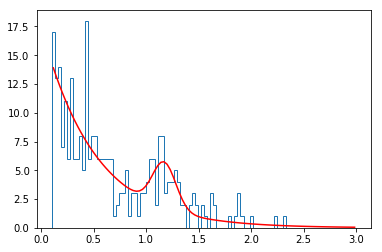

In [9]:
nbins = 100
fit_result = minimizer.values.values()
plt.hist(data, bins=nbins, histtype='step', range=bounds);
plotfitresult(tot_model, bounds, nbins, *fit_result)

In [10]:
def lossbuilder(model, data, weights=None):
    loss = LossFunctionWrapper(probfit.UnbinnedLH(model, data, extended=True, extended_bound=bounds, weights=weights))
    return loss
    
config = Config(tot_model, data, lossbuilder, MinimizerWrapper)
config.bestfit = minimizer.values

In [11]:
calc = AsymptoticCalculator(config)

In [12]:
poinull = POI("mean", value=np.linspace(1.0, 1.4, 60))
poialt = POI("mean", minimizer.values["mean"])
ci_test = ConfidenceInterval(poinull, poialt, calc, qtilde=False)

In [13]:
ci_test.interval();


Get fit best values for nuisance parameters for the alternative hypothesis!


FCN = -1220.1648704592203 
 TOTAL NCALL = 107 
 NCALLS = 107 
 
 
 EDM = 1.8190442120060838e-05 
 GOAL EDM = 5e-06 
 
 UP = 0.5 
 
 
 
 
 Valid 
 Valid Param 
 Accurate Covar 
 PosDef 
 Made PosDef 
 
 
 True 
 True 
 True 
 True 
 False 
 
 
 Hesse Fail 
 HasCov 
 Above EDM 
 
 Reach calllim 
 
 
 False 
 True 
 False 
 
 False

+,Name,Value,Hesse Error,Minos Error-,Minos Error+,Limit-,Limit+,Fixed?
0,tau,1.96342,0.152499,,,0.1,5,No
1,Nbkg,247.878,17.3862,,,0,314.6,No
2,mean,1.17089,1,,,,,Yes
3,sigma,0.111204,0.0291894,,,0,0.5,No
4,Nsig,38.0792,9.71395,,,-10,286,No


Confidence interval on mean:
	1.1422576729959693 < mean < 1.20293595084551 at 0.68% C.L.


In [14]:
pvalues = ci_test.pvalues()
mean = ci_test.poinull.value

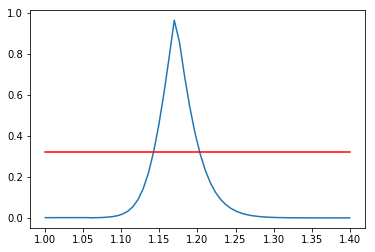

In [15]:
plt.plot(mean, pvalues["clsb"])
plt.plot([mean[0], mean[-1]], [0.32, 0.32], color='r', linestyle='-', linewidth=1.5)